In [1]:
import time
import numpy
import matplotlib.pyplot as plt
numpy.random.seed(1)
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

We will make use of a training and a test set that are based on the popular covertype data set (https://archive.ics.uci.edu/ml/datasets/covertype). For each instance, we are given 54 features. Since the first 10 features contain much larger values than the remaining ones -- which contain values between 0 and 1 -- we rescale them to 0 and 1 as well.

In [2]:
# load training and test set
data_train = numpy.genfromtxt("covtype.train.csv", delimiter=',')
data_test = numpy.genfromtxt("covtype.test.csv", delimiter=',')
Xtrain, ytrain = data_train[:,:-1], data_train[:,-1]
Xtest, ytest = data_test[:,:-1], data_test[:,-1]
print("Number of training instances: {}".format(Xtrain.shape[0]))
print("Number of features: {}".format(Xtrain.shape[1]))
print("Number of test instances: {}".format(Xtest.shape[0]))

# rescale
scaler = preprocessing.MinMaxScaler()
scaler.fit(Xtrain[:, :10])
Xtrain[:,:10] = scaler.transform(Xtrain[:,:10])
Xtest[:,:10] = scaler.transform(Xtest[:,:10])

Number of training instances: 200000
Number of features: 54
Number of test instances: 25000


In [3]:
# fit the nearest neighbor model!
model = KNeighborsClassifier(n_neighbors=10, algorithm='kd_tree')

#Xtrain_new = Xtrain[:, :5]
#Xtest_new = Xtest[:, :5]

#model.fit(Xtrain_new, ytrain)

[0]
[0, 5]
[0, 5, 9]
[0, 5, 9, 12]
[0, 5, 9, 12, 23]


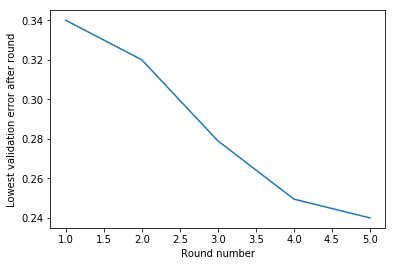

In [4]:
# initialize variables and lists
feats = []
error = []
rounds = [1, 2, 3, 4, 5]

# separate training and validation datasets from random 10000 instances of data_train
data_fs = data_train[numpy.random.choice(len(data_train), size = 10000, replace = False), :]
Xtrain_fs, ytrain_fs = data_fs[0:8000, :-1], data_fs[0:8000, -1]
Xval_fs, yval_fs = data_fs[8000:10000, :-1], data_fs[8000:10000, -1]

# feature selection loop
for i in range(5):
    min_err = 10
    for f in range(54):
        l = feats.copy()
        l.append(f)
        X = Xtrain_fs[:, l]
        Xv = Xval_fs[:, l]
        model.fit(X, ytrain_fs)
        pred = model.predict(Xv)
        ac = accuracy_score(yval_fs, pred)
        err = 1 - ac
        #print('Feature {}: {}' .format(f, err))
        if(err < min_err):
            min_err = err
            ind = f
    feats.append(ind)
    error.append(min_err)
    print(feats)
    
plt.plot(rounds, error)
plt.xlabel('Round number')
plt.ylabel('Lowest validation error after round')
plt.savefig('fs.png', dpi=300, bbox_inches='tight')

In [8]:
Xtrain_best = Xtrain[:, feats]
Xtest_best = Xtest[:, feats]

print(Xtest_best.shape)

model.fit(Xtrain_best, ytrain)

(25000, 5)


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [9]:
# apply the model and compute runtime
start = time.clock()
preds = model.predict(Xtest_best)
elapsed = time.clock() - start

print(elapsed)

1.6255009999999999


In [10]:
# compute the accuracy on the test set
acc = accuracy_score(ytest, preds)
print("Accuracy on test set: {}".format(acc))

Accuracy on test set: 0.87712
